In [12]:
#imports
import pandas as pd 
import numpy as np

In [13]:
#reading csv into data frame
df = pd.read_csv('player_records.csv')
df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,tr,Male,tr,survived
1,3,23,tr,heavy debt,survived
2,5,35,tr,debt,survived
3,6,tr,tr,debt,survived
4,7,tr,Female,heavy debt,survived


In [14]:
#data pre-processing

#replacing all tr to NaN 
df.replace('tr', np.nan, inplace=True)
df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,NaN,Male,NaN,survived
1,3,23,NaN,heavy debt,survived
2,5,35,NaN,debt,survived
3,6,NaN,NaN,debt,survived
4,7,NaN,Female,heavy debt,survived


In [15]:
#Age column

#convert age to float 
df['Age'] = df['Age'].astype(float)

#getting youngest and oldest age
youngest = df['Age'].min()
oldest = df['Age'].max()

#replacing NaN values with a randomly generated number
#between youngest and oldeset
df['Age'] = df['Age'].apply(lambda x: np.random.randint(youngest, oldest + 1) if np.isnan(x) else x)
df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,58.0,Male,NaN,survived
1,3,23.0,NaN,heavy debt,survived
2,5,35.0,NaN,debt,survived
3,6,26.0,NaN,debt,survived
4,7,64.0,Female,heavy debt,survived


In [16]:
#Sex column

#replacing Male and Female with 0 and 1 
df['Sex'].replace(['Male', 'Female'], [0,1], inplace=True)

#forward filling
df['Sex'].fillna(method='ffill', inplace=True)

df['Sex'] = df['Sex'].astype(float)

df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,58.0,0.0,NaN,survived
1,3,23.0,0.0,heavy debt,survived
2,5,35.0,0.0,debt,survived
3,6,26.0,0.0,debt,survived
4,7,64.0,1.0,heavy debt,survived


In [17]:
#Debt column

#replacing NaN in debt
debtArray = ['debt', 'heavy debt']
df['Debt'].fillna(debtArray[np.random.randint(0,2)], inplace=True)

# Define a function to replace 'debt' and 'heavy debt' with random values
def replace_debt(row):
    if row == 'debt':
        return np.random.randint(100000000, 700000001)
    else:
        return np.random.randint(700000001, 1500000000)


# Apply the function to the 'Debt' column
df['Debt'] = df['Debt'].apply(replace_debt)

df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,58.0,0.0,687458212,survived
1,3,23.0,0.0,1361899898,survived
2,5,35.0,0.0,298486840,survived
3,6,26.0,0.0,193689183,survived
4,7,64.0,1.0,1347517346,survived


In [18]:
# Ennumerating survival column

df['Survival'].replace(['survived', 'died'], [0,1], inplace=True)
df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,58.0,0.0,687458212,0
1,3,23.0,0.0,1361899898,0
2,5,35.0,0.0,298486840,0
3,6,26.0,0.0,193689183,0
4,7,64.0,1.0,1347517346,0


In [19]:
#Splitting training and testing sets 
from sklearn.model_selection import train_test_split 

#get the output 
df_output = df['Survival']

#get the inputs 
df_inputs = df.drop(columns=['Survival', 'Player Number'])

df_inputs.head()

#prepare the training and testing datasets by a ratio of 70:30
x_train, x_test, y_train, y_test = train_test_split(df_inputs, df_output, test_size=0.3, random_state = 1) 

In [20]:
#Model training with training data 
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(x_train, y_train) 

print('Corefficient: ', lr.coef_)
print('Intercept', lr.intercept_)

Corefficient:  [ 6.03022540e-03 -9.24349824e-03 -2.67791971e-10]
Intercept 0.1959750030883066


In [21]:
#predicting 

from sklearn import metrics

y_pred = lr.predict(x_test)

print(metrics.mean_squared_error(y_test,y_pred))

0.14301427855534263


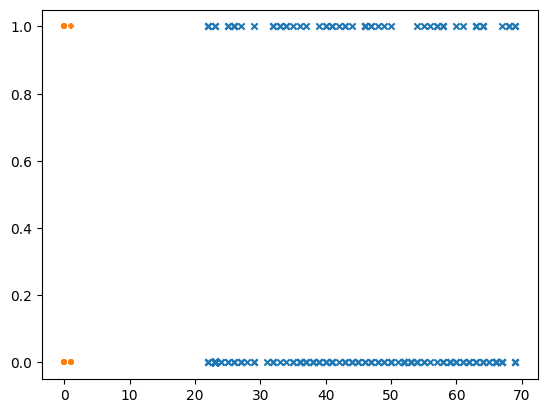

In [ ]:
#exploring the results
import matplotlib.pyplot as plt 

plt.scatter(x_train['Age'], y_train, marker="x",s=20) # training data points
plt.scatter(x_train['Sex'], y_train, marker="+",s=20)
plt.scatter(x_train['Debt'], y_train, marker="*",s=20)
plt.show()

In [ ]:
#Predicting if I would die in squid game 